<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Introducción al Aprendizaje Automático</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el tercer práctico del proyecto, correspondiente a la materia Introducción al Aprendizaje Automático. El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos en el curso, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

En el caso de nuestro proyecto, nos enfrentamos originalmente a un problema de clasificación múltiple con datos etiquetados. Sin embargo, a los fines de este práctico, lo transformaremos en un problema de clasificación binario, adaptando las etiquetas del dataset. Además, será importante evaluar el desbalance de clases y qué decisiones tomaremos al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as skl
import warnings

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(0)  # Para mayor determinismo

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)
warnings.filterwarnings('ignore')

## Consigna para Introducción al Aprendizaje Automático

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes.La división entre train y test será realizada en este mismo práctico.
A continuación se detallan los pasos a seguir para el preprocesamiento de los datos.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, luego de haber unido ambos datasets, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el práctico anterior.
En esta etapa, pueden adicionar los atributos que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Target`. Por ejemplo, la que crearon de aparatos tecnológicos.

#### 3. Dataset para Problema de Clasificación Binario

Si bien nuestro problema original es uno de clasificación múltiple, comenzaremos por tratarlo como un problema de clasificación binario, en donde nuestro objetivo será:
    
    1 = Corresponde a un hogar vulnerable o pobre (Target != 4)
    0 = Corresponde a un hogar no vulnerable (Target == 4)

Es decir, queremos identificar los hogares vulnerables o en situación de pobreza, ya sea moderada o extrema.
En base a esta definición, deben transformar el dataset para adaptarlo a un problema de clasifiación binario.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?

#### 4. Multicolinealidad Exacta y Variables Dummies

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada.

Dadas las características de nuestro dataset, nos encontramos con múltiples variables dummies; ¿qué ocurre con la correlación entre ellas? Hacer la siguiente prueba: Tomar un set de dummies correspondientes a la misma categoría, crear una nueva variable como la suma de k-1 de ellas y obtener la correlación de esta nueva variable con la dummy k-ésima.

Luego, responder: ¿Qué implicancia tiene esto en modelos lineales? ¿Cómo se puede solucionar? ¿Qué decisión tomarían al respecto?

#### 5. Clasificación a Nivel Hogar o a Nivel Individuo

A partir de análisis previos, sabemos que en nuestro problema la clasificación corresponde al hogar (y no al individuo). Es decir, cada hogar tendrá una única etiqueta. Por lo tanto, para aplicar los modelos, se presentan las siguientes opciones:

a. Quedarse sólo con los individuos jefes o jefas de hogar, y de éstos, con todas las variables asociadas que se repiten para el hogar. Asimismo, crear variables con medidas resumen para todas las variables que no se repitan por hogar.

b. Mantener el dataset a nivel individuo.

Transformar el dataset como se describe en el punto a y guardarlo en una nueva variable. Del siguiente punto en adelante, deberán resolver para los dos datasets, el nuevo y el original.

#### 6. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que muchos de los algoritmos de clasificación supervisada lo requieren. ¿En qué casos tendrá que implementarse normalización?

Aplicar a los datasets la normalización de atributos que consideren adecuada.

#### 7. Mezca Aleatória y División en Train/Test

Finalmente, están en condiciones de **dividir el dataset en Train y Test**, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente.
De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Clasificación

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación **para ambos datasets**, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)

Para cada uno de ellos, se pide responder las siguientes consignas:
- Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
- Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
- Obtener accuracy o exactitud.

De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

#### 1. Descripción de la Hipótesis

¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

#### 2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4. Justificación de las Selecciones

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, o de búsqueda exahustiva, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros.
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
    + Accuracy o exactitud
    + Reporte de clasificación
    + Confusion matrix o matriz de confusión (graficar como heatmap)
    + Curva ROC y área bajo la curva (AUC).

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [3]:
# Cargamos el dataset original en una variable
url_data_train = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data_train)
_ds.shape

(9557, 143)

In [4]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo a mano
# Si hay nueva metadata, cargarla posteriormente
url_fields_info = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/Dataset%20Fields.txt'
_data_fields = pd.read_csv(url_fields_info, sep='\t', encoding = 'cp1252')
_data_fields

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household
5,refrig,=1 if the household has refrigerator
6,v18q,owns a tablet
7,v18q1,number of tablets household owns
8,r4h1,Males younger than 12 years of age
9,r4h2,Males 12 years of age and older


Recuerden que la variable `Target` constituye nuestro objetivo original de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habita cada individuo, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

In [5]:
# Eliminamos columnas que son features calculadas en base a otras features
#_calc_feat = _ds.loc[:,'SQBescolari':'agesq'].columns
#print('Columnas eliminadas: ', _calc_feat.values)
#_ds.drop(columns = _calc_feat, inplace = True)

<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [6]:
from Scritps.curacion import Curacion

In [7]:
_ds_reduced,_data_fields_reduced,ind_cols,hogar_cols=Curacion(_ds,_data_fields)

In [8]:
_ds_reduced.head()

,Id,Edad,female,male,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,Anios_escolaridad_hechos,Anios_escolaridad_faltantes,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,Tiene_tablet,Cant_tablets,Cant_hom_menores_12,Cant_hom_mayores_12,Total_hombres,Cant_muj_menores_12,Cant_muj_mayores_12,Total_mujeres,Cant_indiv_menores_12,Cant_indiv_mayores_12,Total_indiv,Tamanio_vivienda,Cant_habitantes_depend,Educ_jefe,Razon_Hombres_Total,Razon_Mujeres_Total,Razon_Ninios_Total,Razon_Adultos_Total,Razon_Ancianos_Total,idhogar,Renta,hogar_nin,hogar_adul,hogar_mayor,Exceso_habitaciones,Habitaciones,Exceso_ambientes,Tiene_banio,refrig,Tamanio_hogar_hhsize,Educ_media,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,Electridad_publica,Electridad_privada,Electridad_no_tiene,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,bedrooms,Indiv_x_ambientes,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,Central,Chorotega,Pacifico_Central,Brunca,Huetar_Atlantica,Huetar_Norte,area1,area2,Target
0,ID_279628684,43,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0.0,10,1.0,0.0,0.0,1.0,0.0,21eb7fcc1,190000.0,0,1,0,0,3,0,1,1,1,10.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,4
1,ID_f29eb3ddd,67,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,1,1,1,1.0,12,1.0,0.0,0.0,1.0,1.0,0e5d7a658,135000.0,0,1,1,0,4,0,1,1,1,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,4
2,ID_68de51c94,92,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1.0,11,0.0,1.0,0.0,1.0,1.0,2c7317ea8,0.0,0,1,1,0,8,0,1,1,1,11.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4
3,ID_d671db89c,17,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,9,1,0,0,0,1,0,0,0,0,0,1,1,0,2,2,1,1,2,1,3,4,4,1.0,11,0.5,0.5,0.5,0.5,0.0,2b58d945f,180000.0,2,2,0,0,5,0,1,1,4,11.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,4
4,ID_d56d6f5f5,37,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,0,1,1,0,2,2,1,1,2,1,3,4,4,1.0,0,0.5,0.5,0.5,0.5,0.0,2b58d945f,180000.0,2,2,0,0,5,0,1,1,4,11.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,4


In [9]:
_data_fields_reduced.head()

,Variable_name,Variable_description
0,Renta,Monthly rent payment
1,Exceso_habitaciones,=1 Overcrowding by bedrooms
2,Habitaciones,number of all rooms in the house
3,Exceso_ambientes,=1 Overcrowding by rooms
4,Tiene_banio,=1 has bathroom in the household


### 3. Dataset para Problema de Clasificación Binario

En esta instancia deberán transformar la variable ```Target```, de modo que:
    
    1 = Corresponde a un hogar vulnerable o pobre (Target != 4)
    0 = Corresponde a un hogar no vulnerable (Target == 4)
    
Luego, evaluar el balance de clases. Dejar plasmadas las decisiones que tomen al respecto.

In [10]:
_ds_reduced['Target'].value_counts()

4    5970
2    1437
3    1112
1     703
Name: Target, dtype: int64

In [11]:
_ds_reduced['Target'] = (_ds_reduced['Target'] != 4).astype(int)

In [12]:
_ds_reduced['Target'].value_counts()

0    5970
1    3252
Name: Target, dtype: int64

### 4. Multicolinealidad Exacta y Variables Dummies

¿Qué ocurre con la correlación entre las variables dummies de una misma categoría?
En este paso, deberán desarrollar la siguiente prueba: Tomar un conjunto de dummies correspondientes a la misma categoría, crear una nueva variable como la suma de k-1 de ellas y obtener la correlación de esta nueva variable con la dummy k-ésima.

Luego, responder: ¿Qué implicancia tiene esto en modelos lineales? ¿Cómo se puede solucionar?

In [13]:
_ds_reduced_pared_sum = _ds_reduced.loc[:,'Educ_media':'paredother']

In [14]:
_ds_reduced_pared_sum['sum_k_menos1'] = _ds_reduced_pared_sum['paredblolad'] + _ds_reduced_pared_sum['paredzocalo'] + _ds_reduced_pared_sum['paredpreb'] + _ds_reduced_pared_sum['pareddes'] + _ds_reduced_pared_sum['paredmad'] + _ds_reduced_pared_sum['paredzinc'] + _ds_reduced_pared_sum['paredfibras']

In [15]:
_ds_reduced_pared_sum.drop_duplicates()

,Educ_media,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,sum_k_menos1
0,10.000000,1,0,0,0,0,0,0,0,1
1,12.000000,0,0,0,0,1,0,0,0,1
2,11.000000,0,0,0,0,1,0,0,0,1
3,11.000000,1,0,0,0,0,0,0,0,1
11,23.000000,0,0,1,0,0,0,0,0,1
13,9.500000,0,0,1,0,0,0,0,0,1
15,17.000000,0,0,0,0,1,0,0,0,1
19,13.500000,1,0,0,0,0,0,0,0,1
21,10.000000,0,0,0,0,1,0,0,0,1
23,10.333333,1,0,0,0,0,0,0,0,1


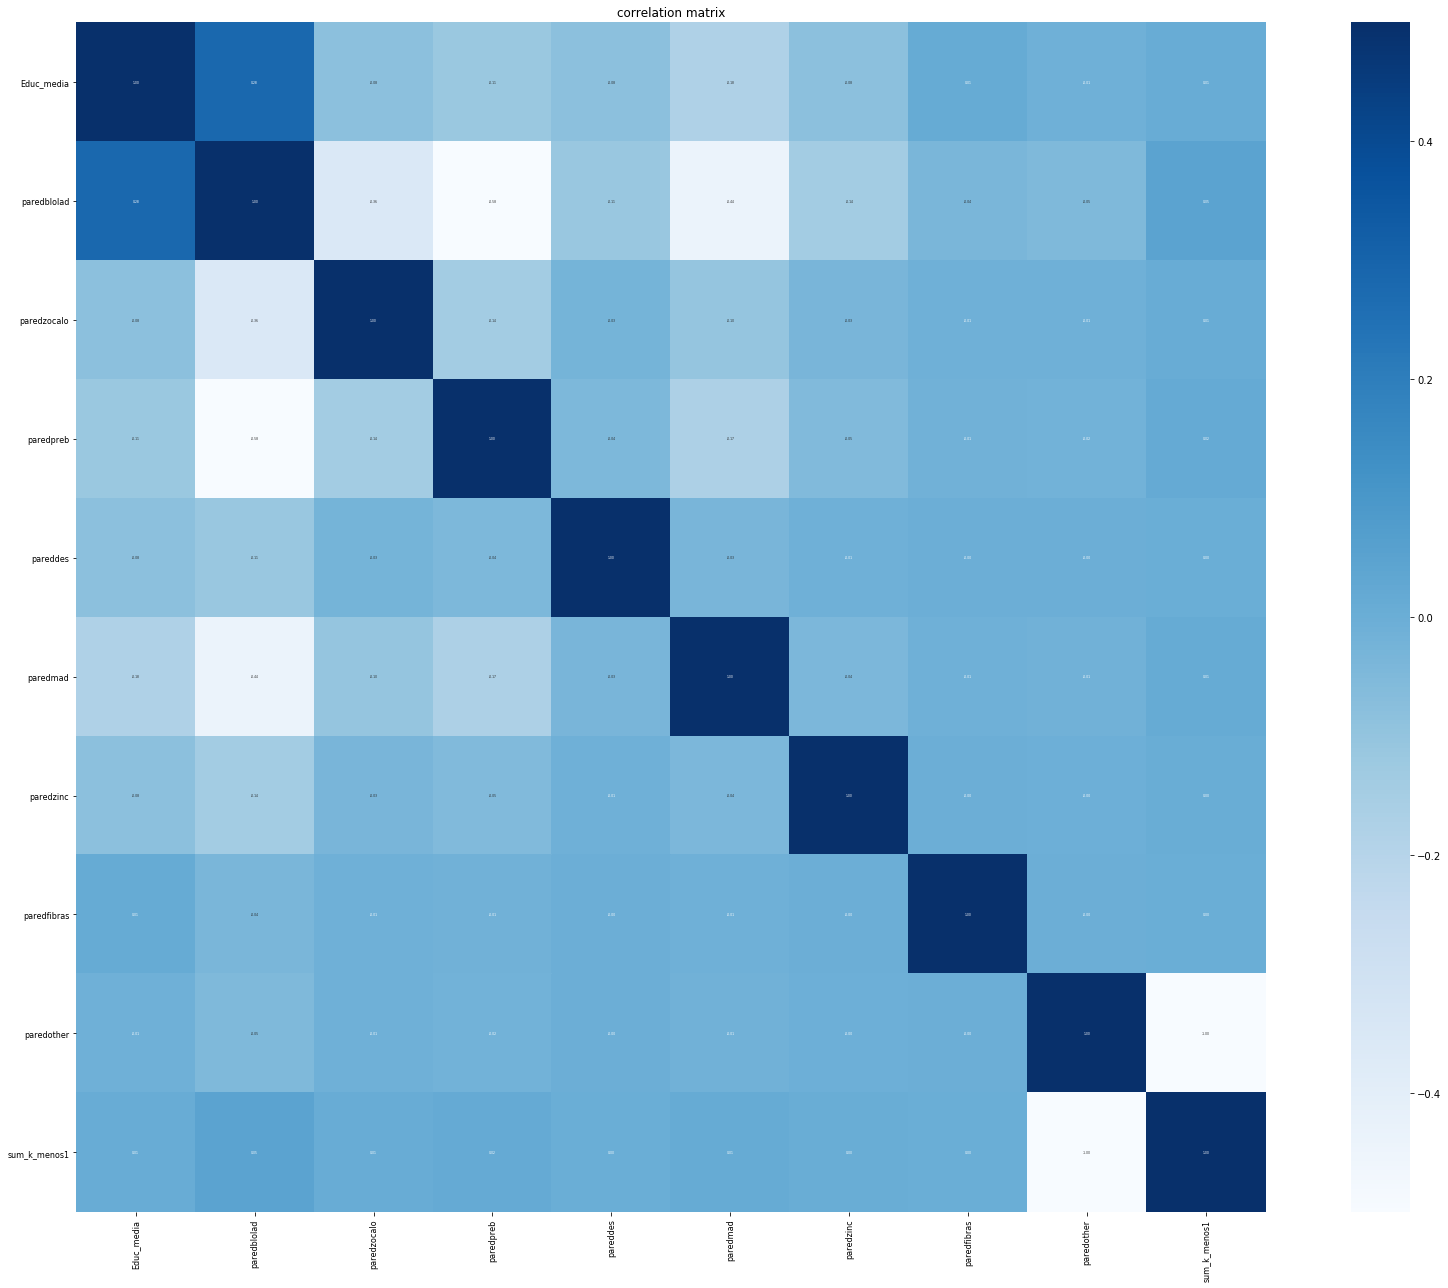

In [16]:
# Matriz de correlación:

corrmat = _ds_reduced_pared_sum.corr()
#f, ax = plt.subplots(figsize=(17, 12))
#sns.set()
#sns.heatmap(corrmat, vmax=.8, square=True);

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(corrmat, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corrmat.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corrmat.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corrmat.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
plt.savefig("HeatMap.png", dpi=300) #Guarda una imagen con mayor nitidez en la carpeta donde se encuentre esta notebook

- Analizando el mapa de calor podemos ver que la relación entre los features `sumatoria dummie k-1` y `dummie k` es inversamente proporcional, es decir que sabiendo el valor de los k-1 features podemos deducir el de k. Esto nos permite eliminar un feature de cada grupo, ya que existe multicolinealidad perfecta. Lo mismo ocurre lógicamente con los dummies pares, como el sexo. Con esta conclusión decidimos actualizar el script eliminando la dummie k (una cualquiera) de cada grupo.

- Para afirmar lo que el mapa de calor nos muestra a simple vista, tambien vamos a utilizar un calculo de coeficiente de relacion entre variablas, el mismo nos indica que si el valor es +-1 la relacion es perfecta, es decir que las variables cuentan con una relacion linealmente perfecta. 

In [17]:
corrmat[['paredother']].sort_values(by = 'paredother',ascending = False)\
.style.background_gradient()

,paredother
paredother,1
paredfibras,-0.00114895
pareddes,-0.00355445
paredzinc,-0.00445823
Educ_media,-0.0091792
paredzocalo,-0.0113129
paredmad,-0.0139619
paredpreb,-0.0185904
paredblolad,-0.0477537
sum_k_menos1,-1


In [18]:
corrmat[['Educ_media']].sort_values(by = 'Educ_media',ascending = False)\
.style.background_gradient()

,Educ_media
Educ_media,1
paredblolad,0.282078
paredfibras,0.0144513
sum_k_menos1,0.0091792
paredother,-0.0091792
pareddes,-0.0786885
paredzocalo,-0.0805891
paredzinc,-0.0807673
paredpreb,-0.114983
paredmad,-0.175806


- Como podemos notar la variable `sum_k_menos1` presenta un coeficiente de -1 con respecto a la variable `paredother`. Esto quiere decir que ambas variables estan linealmente correlacionadas.

- Ahora si comparamos por ejemplo `paredother` Vs `Educ_Media`, notamos que el coeficiente es de 0.0091792 esto indica que la relacion entre ambas variables no es Perfectamente lineal y no posee un coeficiente muy alto indicando que aunque no sea linealmente perfecta existe una relacion entre ellas de nivel Casi nulo.

In [19]:
#Estos pasos se agregarán al script de limpieza en la prox notebook:
#Decidimos limpiar solo dummies y no todas las columnas que podrían tener correlación perfecta porque podría no ser tan claro leerlas, como por ejemplo: Tiene_tablet podría omitirse si es que vale 1 siempre que Cant_tablets > 0; o Total_hombres podría quitarse si se mantienen Total_indiv y Total_mujeres 
_ds_reduced.drop(columns = ['male','estadocivil7','parentesco12','instlevel9','paredother','pisonotiene','techootro','abastaguano','Electridad_no_tiene','sanitario6','energcocinar4','elimbasu6','epared3','etecho3','eviv3','tipovivi5','Huetar_Norte','area2'], inplace = True)
_data_fields_reduced = _data_fields_reduced[(_data_fields_reduced.Variable_name != 'male') & (_data_fields_reduced.Variable_name != 'estadocivil7') & (_data_fields_reduced.Variable_name != 'parentesco12') & (_data_fields_reduced.Variable_name != 'instlevel9') & (_data_fields_reduced.Variable_name != 'paredother') & (_data_fields_reduced.Variable_name != 'pisonotiene') & (_data_fields_reduced.Variable_name != 'techootro') & (_data_fields_reduced.Variable_name != 'abastaguano') & (_data_fields_reduced.Variable_name != 'Electridad_no_tiene') & (_data_fields_reduced.Variable_name != 'sanitario6') & (_data_fields_reduced.Variable_name != 'energcocinar4') & (_data_fields_reduced.Variable_name != 'elimbasu6') & (_data_fields_reduced.Variable_name != 'epared3') & (_data_fields_reduced.Variable_name != 'etecho3') & (_data_fields_reduced.Variable_name != 'eviv3') & (_data_fields_reduced.Variable_name != 'tipovivi5') & (_data_fields_reduced.Variable_name != 'Huetar_Norte') & (_data_fields_reduced.Variable_name != 'area2')]
hogar_cols.remove('paredother')
hogar_cols.remove('pisonotiene')
hogar_cols.remove('techootro')
hogar_cols.remove('abastaguano')
hogar_cols.remove('Electridad_no_tiene')
hogar_cols.remove('sanitario6')
hogar_cols.remove('energcocinar4')
hogar_cols.remove('elimbasu6')
hogar_cols.remove('epared3')
hogar_cols.remove('etecho3')
hogar_cols.remove('eviv3')
hogar_cols.remove('tipovivi5')
hogar_cols.remove('Huetar_Norte')
hogar_cols.remove('area2')

### 5. Clasificación a Nivel Hogar o a Nivel Individuo

En este punto, deberán crear un nuevo dataset, `_ds_hogar`, manteniendo únicamente los individuos jefe de hogar (```parentesco1 == 1```) y los atributos que se repitan por hogar. Para aquellos atributos individuales, crear medidas sintéticas por hogar relevantes (suma, promedio simple, promedio ponderado, máximo, mínimo, etc.).

Por ejemplo, para la escolaridad, mantendría la de la persona jefa de hogar y crearía otra (u otras) que indiquen la escolaridad promedio o la escolaridad promedio por adulto.

In [20]:
_ds_individuo = _ds_reduced
_ds_hogar = _ds_reduced[_ds_reduced['parentesco1'] == 1]
_ds_hogar.head()

,Id,Edad,female,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,Anios_escolaridad_hechos,Anios_escolaridad_faltantes,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,Tiene_tablet,Cant_tablets,Cant_hom_menores_12,Cant_hom_mayores_12,Total_hombres,Cant_muj_menores_12,Cant_muj_mayores_12,Total_mujeres,Cant_indiv_menores_12,Cant_indiv_mayores_12,Total_indiv,Tamanio_vivienda,Cant_habitantes_depend,Educ_jefe,Razon_Hombres_Total,Razon_Mujeres_Total,Razon_Ninios_Total,Razon_Adultos_Total,Razon_Ancianos_Total,idhogar,Renta,hogar_nin,hogar_adul,hogar_mayor,Exceso_habitaciones,Habitaciones,Exceso_ambientes,Tiene_banio,refrig,Tamanio_hogar_hhsize,Educ_media,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisoother,pisonatur,pisomadera,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,Electridad_publica,Electridad_privada,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,etecho1,etecho2,eviv1,eviv2,bedrooms,Indiv_x_ambientes,tipovivi1,tipovivi2,tipovivi3,tipovivi4,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,Central,Chorotega,Pacifico_Central,Brunca,Huetar_Atlantica,area1,Target
0,ID_279628684,43,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0.0,10,1.00,0.00,0.0,1.0,0.0,21eb7fcc1,190000.0,0,1,0,0,3,0,1,1,1,10.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1.000000,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0
1,ID_f29eb3ddd,67,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1.0,12,1.00,0.00,0.0,1.0,1.0,0e5d7a658,135000.0,0,1,1,0,4,0,1,1,1,12.0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,1.000000,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0
2,ID_68de51c94,92,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1.0,11,0.00,1.00,0.0,1.0,1.0,2c7317ea8,0.0,0,1,1,0,8,0,1,1,1,11.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,ID_ec05b1a7b,38,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,1,1,0,2,2,1,1,2,1,3,4,4,1.0,11,0.50,0.50,0.5,0.5,0.0,2b58d945f,180000.0,2,2,0,0,5,0,1,1,4,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,1,3,1,0,0,0,0,1,0
8,ID_1284f8aad,30,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2,1,3,2,2,4,4,1.0,9,0.25,0.75,0.5,0.5,0.0,d6dae86b7,130000.0,2,2,0,1,2,0,1,1,4,10.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,4.000000,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0


##### FIX

- Antes de proseguir, verificando que la variable Target sea única por hogar, encontramos algunos casos en los que se verifica una inconsistencia.
- Agregamos este filtro de limpieza de hogares al script incial de curado.

In [21]:
_hogar_dup =_ds_reduced.groupby('idhogar')['Target'].nunique().reset_index().query('Target > 1')
print(_hogar_dup)

## Agregamos este filtro al script inicial
#_ds = _ds[~_ds['idhogar'].isin(list(_hogar_dup['idhogar']))]

Empty DataFrame
Columns: [idhogar, Target]
Index: []


Agrupamos los features individuales del hogar

In [22]:
_ds_reduced.head()

,Id,Edad,female,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,Anios_escolaridad_hechos,Anios_escolaridad_faltantes,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,Tiene_tablet,Cant_tablets,Cant_hom_menores_12,Cant_hom_mayores_12,Total_hombres,Cant_muj_menores_12,Cant_muj_mayores_12,Total_mujeres,Cant_indiv_menores_12,Cant_indiv_mayores_12,Total_indiv,Tamanio_vivienda,Cant_habitantes_depend,Educ_jefe,Razon_Hombres_Total,Razon_Mujeres_Total,Razon_Ninios_Total,Razon_Adultos_Total,Razon_Ancianos_Total,idhogar,Renta,hogar_nin,hogar_adul,hogar_mayor,Exceso_habitaciones,Habitaciones,Exceso_ambientes,Tiene_banio,refrig,Tamanio_hogar_hhsize,Educ_media,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisoother,pisonatur,pisomadera,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,Electridad_publica,Electridad_privada,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,etecho1,etecho2,eviv1,eviv2,bedrooms,Indiv_x_ambientes,tipovivi1,tipovivi2,tipovivi3,tipovivi4,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,Central,Chorotega,Pacifico_Central,Brunca,Huetar_Atlantica,area1,Target
0,ID_279628684,43,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0.0,10,1.0,0.0,0.0,1.0,0.0,21eb7fcc1,190000.0,0,1,0,0,3,0,1,1,1,10.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1.000000,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0
1,ID_f29eb3ddd,67,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1.0,12,1.0,0.0,0.0,1.0,1.0,0e5d7a658,135000.0,0,1,1,0,4,0,1,1,1,12.0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,1.000000,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0
2,ID_68de51c94,92,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1.0,11,0.0,1.0,0.0,1.0,1.0,2c7317ea8,0.0,0,1,1,0,8,0,1,1,1,11.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,ID_d671db89c,17,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0,1,0,0,0,0,1,1,0,2,2,1,1,2,1,3,4,4,1.0,11,0.5,0.5,0.5,0.5,0.0,2b58d945f,180000.0,2,2,0,0,5,0,1,1,4,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,1,3,1,0,0,0,0,1,0
4,ID_d56d6f5f5,37,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,1,0,0,0,1,1,0,2,2,1,1,2,1,3,4,4,1.0,0,0.5,0.5,0.5,0.5,0.0,2b58d945f,180000.0,2,2,0,0,5,0,1,1,4,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,1,3,1,0,0,0,0,1,0


In [23]:
_ds_hogar = _ds_reduced.groupby(hogar_cols).agg({
    'female': 'sum',
    #'male':'sum',
    'Edad': 'mean',
    'dis': 'sum',
    'Anios_escolaridad_hechos':'mean',
    'Anios_escolaridad_faltantes':'mean',
    'estadocivil1':'sum',
    'estadocivil2':'sum',
    'estadocivil3':'sum',
    'estadocivil4':'sum',
    'estadocivil5':'sum',
    'estadocivil6':'sum',
    #'estadocivil7':'sum',
    'parentesco1':'sum',
    'parentesco2':'sum',
    'parentesco3':'sum',
    'parentesco4':'sum',
    'parentesco5':'sum',
    'parentesco6':'sum',
    'parentesco7':'sum',
    'parentesco8':'sum',
    'parentesco9':'sum',
    'parentesco10':'sum',
    'parentesco11':'sum',
    #'parentesco12':'sum',
    'instlevel1':'sum', 
    'instlevel2':'sum',
    'instlevel3':'sum', 
    'instlevel4':'sum', 
    'instlevel5':'sum',
    'instlevel6':'sum',
    'instlevel7':'sum', 
    'instlevel8':'sum'#, 
    #'instlevel9':'sum'
}).reset_index()

In [24]:
_ds_hogar = _ds_hogar.rename(columns={
    'female': 'Cant_mujeres',
    #'male':'Cant_hombres',
    'Edad': 'Edad_promedio',
    'dis': 'Cant_disc',
    'Anios_escolaridad_hechos':'Anios_escol_hechos_promedio',
    'Anios_escolaridad_faltantes':'Anios_escol_faltantes_promedio',
    'estadocivil1':'Cant_estadocivil1',
    'estadocivil2':'Cant_estadocivil2',
    'estadocivil3':'Cant_estadocivil3',
    'estadocivil4':'Cant_estadocivil4',
    'estadocivil5':'Cant_estadocivil5',
    'estadocivil6':'Cant_estadocivil6',
    #'estadocivil7':'Cant_estadocivil7',
    'parentesco1':'Cant_parentesco1',
    'parentesco2':'Cant_parentesco2',
    'parentesco3':'Cant_parentesco3',
    'parentesco4':'Cant_parentesco4',
    'parentesco5':'Cant_parentesco5',
    'parentesco6':'Cant_parentesco6',
    'parentesco7':'Cant_parentesco7',
    'parentesco8':'Cant_parentesco8',
    'parentesco9':'Cant_parentesco9',
    'parentesco10':'Cant_parentesco10',
    'parentesco11':'Cant_parentesco11',
    #'parentesco12':'Cant_parentesco12',
    'instlevel1':'Cant_instlevel1', 
    'instlevel2':'Cant_instlevel2',
    'instlevel3':'Cant_instlevel3', 
    'instlevel4':'Cant_instlevel4', 
    'instlevel5':'Cant_instlevel5',
    'instlevel6':'Cant_instlevel6',
    'instlevel7':'Cant_instlevel7', 
    'instlevel8':'Cant_instlevel8'#, 
    #'instlevel9':'Cant_instlevel9'
})

In [25]:
_ds_hogar.head()

,idhogar,Renta,hogar_nin,hogar_adul,hogar_mayor,Exceso_habitaciones,Habitaciones,Exceso_ambientes,Tiene_banio,refrig,Tamanio_hogar_hhsize,Educ_media,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisoother,pisonatur,pisomadera,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,Electridad_publica,Electridad_privada,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,etecho1,etecho2,eviv1,eviv2,bedrooms,Indiv_x_ambientes,tipovivi1,tipovivi2,tipovivi3,tipovivi4,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,Central,Chorotega,Pacifico_Central,Brunca,Huetar_Atlantica,area1,Target,Cant_mujeres,Edad_promedio,Cant_disc,Anios_escol_hechos_promedio,Anios_escol_faltantes_promedio,Cant_estadocivil1,Cant_estadocivil2,Cant_estadocivil3,Cant_estadocivil4,Cant_estadocivil5,Cant_estadocivil6,Cant_parentesco1,Cant_parentesco2,Cant_parentesco3,Cant_parentesco4,Cant_parentesco5,Cant_parentesco6,Cant_parentesco7,Cant_parentesco8,Cant_parentesco9,Cant_parentesco10,Cant_parentesco11,Cant_instlevel1,Cant_instlevel2,Cant_instlevel3,Cant_instlevel4,Cant_instlevel5,Cant_instlevel6,Cant_instlevel7,Cant_instlevel8
0,001ff74ca,0.0,1,1,0,0,6,0,1,1,2,16.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,4,0.500000,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,2,19.000000,0,8.000000,0.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,003123ec2,0.0,2,2,0,0,3,0,1,1,4,6.5,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,2,2.000000,0,0,0,0,0,0,1,2,0,0,0,0,1,1,1,1,12.750000,0,3.250000,0.0,2,2,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0
2,004616164,0.0,1,1,0,0,4,0,1,1,2,3.0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,3,0.666667,0,0,0,0,0,0,1,2,0,1,0,0,0,0,1,0,33.000000,0,7.000000,0.0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,004983866,0.0,1,1,0,0,5,0,1,1,2,8.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,2,1.000000,1,0,0,0,0,0,1,2,0,0,1,0,0,1,1,1,37.500000,0,7.500000,1.0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
4,005905417,0.0,2,1,0,0,8,0,1,0,3,9.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,6,0.500000,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,17.333333,0,5.666667,0.0,1,0,0,0,1,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0


### 6. Normalización de Atributos

Aplicar al dataset la normalización de atributos que consideren adecuada.

In [26]:
#Podrían descartarse las columnas binarias por ser innecesario.
#En este caso usamos percentiles de 25 y 75 %, los valores por defecto.
scaler = RobustScaler()   #Initalize scaler estimator
scaler.fit(_ds_reduced.select_dtypes(include=['number'])) #Remember to only fit scaler to training data
_ds_reduced = pd.DataFrame(scaler.transform(_ds_reduced.select_dtypes(include=['number'])),columns=_ds_reduced.select_dtypes(include=['number']).columns)

In [27]:
_ds_reduced.dtypes.value_counts()

float64    116
dtype: int64

In [28]:
_ds_reduced.select_dtypes(include=['object']).head(1)

""
0


Solo normalizamos las columnas numéricas.
Decidimos utilizar RobustScaler ya que tiene en cuenta el trato diferenciado para los outliers, trabajando por percentiles en vez de la totalidad de los datos, no siendo influenciado por estos pocos valores tan dispares de los típicos. Sin embargo este método NO excluye los valores atípicos como si lo hacen otros.

### 7. Mezca Aleatória y División en Train/Test

Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

In [29]:
# Para dividir el dataset, utilizar el siguiente módulo:
_ds_hogar_numeric = _ds_hogar.select_dtypes(include=['number'])
_ds_shuff = shuffle(_ds_hogar_numeric)

# Y luego el módulo:

y = _ds_hogar_numeric['Target']
X = _ds_hogar_numeric
X = X.drop(['Target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Notar que X e y son np.arrays. Además, pueden usar el parámetro que incluye train_test_split para mezclar.

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2322, 96), (581, 96), (2322,), (581,))

## II. Aplicación de Modelos de Clasificación

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de clasificación para los dos datasets, `_ds_individuo` y `_ds_hogar`.

Decidimos trabajar con el dataset de hogar. De haber seleccionado el de individuos es muy importante tener en cuenta que para que los datos sean consistentes y representen la realidad NO debemos dejar registros individuales de un mismo id_Hogar en los diferentes dataset (train y test).

### II.A. Dataset Nivel Hogar

### 1. Perceptron

A continuación se aplicará un clasificador Perceptrón.

In [31]:
penalty = 'elasticnet'# Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
alpha = 0.0001 # Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # Cantidad máxima de iteraciones del algoritmo
tol = 0.001 # Criterio de detención

model = Perceptron(penalty = penalty, alpha = alpha, fit_intercept=True, max_iter = max_iter, tol = tol, shuffle=True, random_state=0, class_weight=None, warm_start=False)
model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='elasticnet', random_state=0, shuffle=True,
      tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
# Se calcula la exactitud para ambos conjuntos, train y test:
y_pred_train = model.predict(X_train)   # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =  model.predict(X_test) # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.75
Exactitud del algoritmo para conjunto de validación: 0.75


In [33]:
penalty = 'elasticnet'# Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
alpha = 0.1 # Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # Cantidad máxima de iteraciones del algoritmo
tol = 0.001 # Criterio de detención

model = Perceptron(penalty = penalty, alpha = alpha, fit_intercept=True, max_iter = max_iter, tol = tol, shuffle=True, random_state=0, class_weight=None, warm_start=False)
model.fit(X_train, y_train)

Perceptron(alpha=0.1, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='elasticnet', random_state=0, shuffle=True,
      tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
# Se calcula la exactitud para ambos conjuntos, train y test:
y_pred_train = model.predict(X_train)   # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =  model.predict(X_test) # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.67
Exactitud del algoritmo para conjunto de validación: 0.67


In [35]:
penalty = 'l1'# Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
alpha = 0.0001 # Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # Cantidad máxima de iteraciones del algoritmo
tol = 0.001 # Criterio de detención

model = Perceptron(penalty = penalty, alpha = alpha, fit_intercept=True, max_iter = max_iter, tol = tol, shuffle=True, random_state=0, class_weight=None, warm_start=False)
model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
# Se calcula la exactitud para ambos conjuntos, train y test:
y_pred_train = model.predict(X_train)   # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =  model.predict(X_test) # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.75
Exactitud del algoritmo para conjunto de validación: 0.75


In [37]:
penalty = 'l2'# Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
alpha = 0.0001 # Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # Cantidad máxima de iteraciones del algoritmo
tol = 0.001 # Criterio de detención

model = Perceptron(penalty = penalty, alpha = alpha, fit_intercept=True, max_iter = max_iter, tol = tol, shuffle=True, random_state=0, class_weight=None, warm_start=False)
model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l2', random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
# Se calcula la exactitud para ambos conjuntos, train y test:
y_pred_train = model.predict(X_train)   # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =  model.predict(X_test) # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.75
Exactitud del algoritmo para conjunto de validación: 0.75


¿Cómo sería utilizando el método Stochastic Gradient Descent?

_Hint:_ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [39]:
penalty = 'elasticnet'# Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
alpha = 0.0001 # Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # Cantidad máxima de iteraciones del algoritmo
tol = 0.001 # Criterio de detención

model = SGDClassifier(alpha = alpha, loss="perceptron", eta0=1, learning_rate="constant", penalty=penalty, max_iter = max_iter, tol = tol)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='perceptron',
       max_iter=100, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)   # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =  model.predict(X_test) # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.70
Exactitud del algoritmo para conjunto de validación: 0.70


In [41]:
penalty = 'l1'# Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
alpha = 0.0001 # Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # Cantidad máxima de iteraciones del algoritmo
tol = 0.001 # Criterio de detención

model = SGDClassifier(alpha = alpha, loss="perceptron", eta0=1, learning_rate="constant", penalty=penalty, max_iter = max_iter, tol = tol)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='perceptron',
       max_iter=100, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)   # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =  model.predict(X_test) # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.75
Exactitud del algoritmo para conjunto de validación: 0.74


### 2. K-NN

A continuación se aplicará un clasificador K-NN.

In [43]:
n_neighbors = 10 # Cantidad de vecinos a tener en cuenta
metric = 'euclidean' # Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [44]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.77
Exactitud del algoritmo para conjunto de validación: 0.74


In [45]:
n_neighbors = 10 # Cantidad de vecinos a tener en cuenta
metric = 'manhattan' # Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [46]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.77
Exactitud del algoritmo para conjunto de validación: 0.72


In [47]:
n_neighbors = 10 # Cantidad de vecinos a tener en cuenta
metric = 'chebyshev' # Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [48]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.77
Exactitud del algoritmo para conjunto de validación: 0.72


In [49]:
n_neighbors = 10 # Cantidad de vecinos a tener en cuenta
metric = 'cosine' # Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [50]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.76
Exactitud del algoritmo para conjunto de validación: 0.72


No existen grandes diferencias para las diferentes mediciones de distancia.

### 3. Regresión Logística

A continuación se aplicará un clasificador con regresión logística.

In [51]:
penalty = 'l1'  # Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha = 0.0001  # Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.
max_iter = 100  # Cantidad máxima de iteraciones del algoritmo.
tol = 0.001  # Precisión del algoritmo (error mínimo entre una iteración y la siguiente).

model = LogisticRegression(penalty=penalty, C=1./alpha, max_iter=max_iter, tol=tol)
model.fit(X_train, y_train)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.001, verbose=0, warm_start=False)

In [52]:
# Se calcula la exactitud para ambos conjuntos, train y test:
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))

Exactitud para entrenamiento: 0.79
Exactitud para validación: 0.75


In [53]:
penalty = 'l2'  # Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha = 0.0001  # Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.
max_iter = 100  # Cantidad máxima de iteraciones del algoritmo.
tol = 0.001  # Precisión del algoritmo (error mínimo entre una iteración y la siguiente).

model = LogisticRegression(penalty=penalty, C=1./alpha, max_iter=max_iter, tol=tol)
model.fit(X_train, y_train)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.001, verbose=0, warm_start=False)

In [54]:
# Se calcula la exactitud para ambos conjuntos, train y test:
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))

Exactitud para entrenamiento: 0.67
Exactitud para validación: 0.67


¿Cómo sería utilizando el método Stochastic Gradient Descent?

In [55]:
penalty = 'l1'# Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha = 0.0001 # Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # Cantidad máxima de iteraciones del algoritmo
tol = 0.001 # Criterio de detención

model = SGDClassifier(alpha = alpha, loss="log", eta0=1, learning_rate="constant", penalty=penalty, max_iter = max_iter, tol = tol)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
# Se calcula la exactitud para ambos conjuntos, train y test:

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))

Exactitud para entrenamiento: 0.76
Exactitud para validación: 0.75


In [57]:
penalty = 'l2'# Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha = 0.0001 # Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # Cantidad máxima de iteraciones del algoritmo
tol = 0.001 # Criterio de detención

model = SGDClassifier(alpha = alpha, loss="log", eta0=1, learning_rate="constant", penalty=penalty, max_iter = max_iter, tol = tol)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
# Se calcula la exactitud para ambos conjuntos, train y test:

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))

Exactitud para entrenamiento: 0.55
Exactitud para validación: 0.56


A través de la regularización, es decir la penalizacion a la función de coste, de Lasso l1 (media del valor absoluto de los coeficientes) obtenemos mejores resultados. Esto sucede por que en general los features no están muy correlacionados entre si. De todos modos la diferencia no es muy grande.

### 5. Selección de Parámetros y Métricas Sobre el Conjunto de Evaluación

Para la selección de hiperparámetros, pueden utilizar GridSearch. Además, deben calcular las métricas solicitadas.

In [59]:
def plot_cm(y_true, y_pred, figsize=(7,7)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm_perc, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    ax.set_ylim(len(cm), 0)

#### Perceptron

In [60]:
exploring_params = {
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
        'tol': [0.005, 0.002, 0.001, 0.0001],
        'penalty': ['l1','l2','elasticnet']
    }

m = Perceptron(random_state = 7)
n_cross_val = 5  # Seleccionar folds
scoring = 'roc_auc'
model = GridSearchCV(m, exploring_params, cv=n_cross_val, scoring=scoring)   
model.fit(X_train, y_train)

print("Mejor conjunto de parámetros Perceptron:")
print(model.best_params_)
print()
##print("Puntajes de la grilla:")
#means = model.cv_results_['mean_test_score']
#stds = model.cv_results_['std_test_score']
#print()
#print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
#y_true, y_pred = y_test, model.predict(X_test)
#print(classification_report(y_true, y_pred))

Mejor conjunto de parámetros Perceptron:
{'alpha': 0.0001, 'penalty': 'l2', 'tol': 0.005}



In [61]:
penalty = 'l2'# Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
alpha = 0.0001 # Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # Cantidad máxima de iteraciones del algoritmo
tol = 0.005 # Criterio de detención

model = Perceptron(penalty = penalty, alpha = alpha, fit_intercept=True, max_iter = max_iter, tol = tol, shuffle=True, random_state=7, class_weight=None, warm_start=False)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
#accuracy = accuracy_score(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
auc = metrics.auc(fpr, tpr)
#print('Accuracy: ', accuracy, end="\n\n")
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)), end="\n\n")
print('Matrix: \n', matrix, end="\n\n")
print('Roc_curve - fpr: ', fpr)
print('Roc_curve - tpr: ', tpr)
print('Roc_curve - thresholds: ', thresholds, end="\n\n")
print('AUC: ', auc, end="\n\n")
print('classification_report: ')
print(classification_report(y_test, predictions))

Exactitud para entrenamiento: 0.55
Exactitud para validación: 0.56

Matrix: 
 [[172 215]
 [ 38 156]]

Roc_curve - fpr:  [0.         0.55555556 1.        ]
Roc_curve - tpr:  [0.         0.80412371 1.        ]
Roc_curve - thresholds:  [2 1 0]

AUC:  0.6242840778923253

classification_report: 
              precision    recall  f1-score   support

           0       0.82      0.44      0.58       387
           1       0.42      0.80      0.55       194

   micro avg       0.56      0.56      0.56       581
   macro avg       0.62      0.62      0.56       581
weighted avg       0.69      0.56      0.57       581



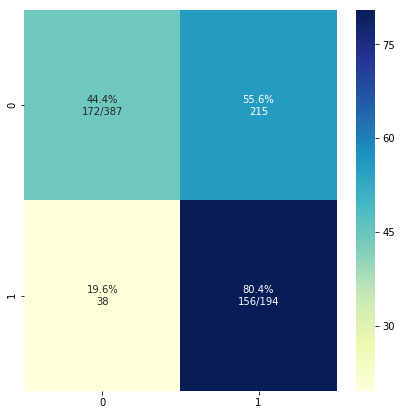

In [62]:
plot_cm(y_test, predictions)

#### KNeighborsClassifier

In [63]:
exploring_params = {
        'n_neighbors': [100, 110, 120, 130],
        'metric': ['cosine','euclidean','manhattan','chebyshev']
    }

m = KNeighborsClassifier()
n_cross_val = 5  # Seleccionar folds
scoring = 'roc_auc'
model = GridSearchCV(m, exploring_params, cv=n_cross_val, scoring=scoring)   
model.fit(X_train, y_train)

print("Mejor conjunto de parámetros KNeighborsClassifier:")
print(model.best_params_)
print()
#print("Puntajes de la grilla:")
#means = model.cv_results_['mean_test_score']
#stds = model.cv_results_['std_test_score']
#print()
#print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
#y_true, y_pred = y_test, model.predict(X_test)
#print(classification_report(y_true, y_pred))

Mejor conjunto de parámetros KNeighborsClassifier:
{'metric': 'manhattan', 'n_neighbors': 120}



In [64]:
n_neighbors = 120 # Cantidad de vecinos a tener en cuenta
metric = 'manhattan' # Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
#accuracy = accuracy_score(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
auc = metrics.auc(fpr, tpr)
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)), end="\n\n")
print('Matrix: \n', matrix, end="\n\n")
print('Roc_curve - fpr: ', fpr)
print('Roc_curve - tpr: ', tpr)
print('Roc_curve - thresholds: ', thresholds, end="\n\n")
print('AUC: ', auc, end="\n\n")
print('classification_report: ')
print(classification_report(y_test, predictions))

Exactitud para entrenamiento: 0.73
Exactitud para validación: 0.74

Matrix: 
 [[371  16]
 [135  59]]

Roc_curve - fpr:  [0.         0.04134367 1.        ]
Roc_curve - tpr:  [0.         0.30412371 1.        ]
Roc_curve - thresholds:  [2 1 0]

AUC:  0.6313900210447801

classification_report: 
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       387
           1       0.79      0.30      0.44       194

   micro avg       0.74      0.74      0.74       581
   macro avg       0.76      0.63      0.63       581
weighted avg       0.75      0.74      0.70       581



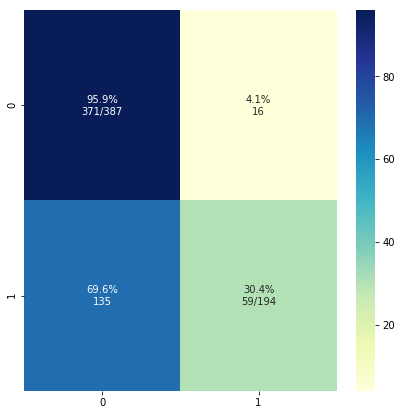

In [65]:
plot_cm(y_test, predictions)

#### LogisticRegression

In [66]:
exploring_params = {
        'C': [0.5, 1, 2, 5, 10, 20, 100, 200], # Inversa del coeficiente de regularización
        'tol': [0.005, 0.002, 0.001, 0.0001],  # Precisión del algoritmo
        'penalty': ['l1','l2']#,
        #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

m = LogisticRegression(random_state=7)
n_cross_val = 5  # Seleccionar folds
scoring = 'roc_auc'
model = GridSearchCV(m, exploring_params, cv=n_cross_val, scoring=scoring)   
model.fit(X_train, y_train)

print("Mejor conjunto de parámetros LogisticRegression:")
print(model.best_params_)
print()
#print("Puntajes de la grilla:")
#means = model.cv_results_['mean_test_score']
#stds = model.cv_results_['std_test_score']
#print()
#print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
#y_true, y_pred = y_test, model.predict(X_test)
#print(classification_report(y_true, y_pred))

Mejor conjunto de parámetros LogisticRegression:
{'C': 0.5, 'penalty': 'l1', 'tol': 0.001}



In [67]:
penalty = 'l1'  # Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
C = 0.5
max_iter = 100  # Cantidad máxima de iteraciones del algoritmo.
tol = 0.001  # Precisión del algoritmo (error mínimo entre una iteración y la siguiente).

exploring_params = {
        'solver': ['liblinear','saga' ] #Para l2
    }

m = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, tol=tol, random_state=7)
n_cross_val = 5  # Seleccionar folds
scoring = 'roc_auc'
model = GridSearchCV(m, exploring_params, cv=n_cross_val, scoring=scoring)   
model.fit(X_train, y_train)

print("Mejor conjunto de parámetros LogisticRegression:")
print(model.best_params_)
print()
#print("Puntajes de la grilla:")
#means = model.cv_results_['mean_test_score']
#stds = model.cv_results_['std_test_score']
#print()
#print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
#y_true, y_pred = y_test, model.predict(X_test)
#print(classification_report(y_true, y_pred))

Mejor conjunto de parámetros LogisticRegression:
{'solver': 'liblinear'}



In [68]:
penalty = 'l1'  # Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
C = 0.5
max_iter = 100  # Cantidad máxima de iteraciones del algoritmo.
tol = 0.001  # Precisión del algoritmo (error mínimo entre una iteración y la siguiente).
solver = 'liblinear'

model = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, tol=tol, random_state=7, solver=solver)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
#accuracy = accuracy_score(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
auc = metrics.auc(fpr, tpr)
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)), end="\n\n")
print('Matrix: \n', matrix, end="\n\n")
print('Roc_curve - fpr: ', fpr)
print('Roc_curve - tpr: ', tpr)
print('Roc_curve - thresholds: ', thresholds, end="\n\n")
print('AUC: ', auc, end="\n\n")
print('classification_report: ')
print(classification_report(y_test, predictions))

Exactitud para entrenamiento: 0.79
Exactitud para validación: 0.77

Matrix: 
 [[341  46]
 [ 89 105]]

Roc_curve - fpr:  [0.         0.11886305 1.        ]
Roc_curve - tpr:  [0.         0.54123711 1.        ]
Roc_curve - thresholds:  [2 1 0]

AUC:  0.7111870321532273

classification_report: 
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       387
           1       0.70      0.54      0.61       194

   micro avg       0.77      0.77      0.77       581
   macro avg       0.74      0.71      0.72       581
weighted avg       0.76      0.77      0.76       581



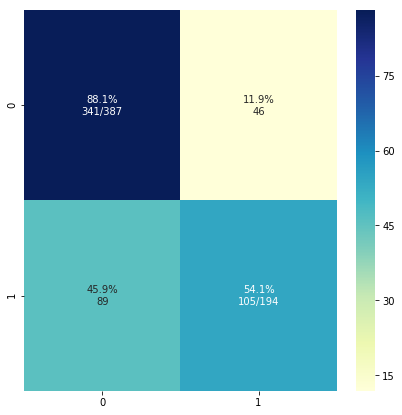

In [69]:
plot_cm(y_test, predictions)

### 4. Selección del Modelo

#### 4.1. Selección y Descripción de Hipótesis

Describir el problema y la hipótesis del modelo.

El problema radica en encontrar un modelo que sea capaz de, dados ciertos features que describen al hogar y otros al individuo entrevistado, sepa identificar hogares target 4 de hogares target diferente de 4. Para ello se cuenta con un dataset de test con los target ya identificados.
Se espera que la predicción sea igual a la clase asociada al target real de cada hogar, además por supuesto de que para cada individuo de un mismo hogar le prediga un mismo target.

#### 4.2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

GridSearchCV propone utilizar l1, Lasso. Ya en II.3 se veía mayor exactitud al comparar regularización l1 contra l2. 

#### 4.3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

Se utiliza liblinear, compatible con l1.

#### 4.4. Justificación de las Selecciones

A continuación, se justifican las elecciones previas.

Se decide conservar el modelo de Regresión Logística por presentar mayor exactitud al momento de predecir tanto en el dataset de prueba como el de entrenamiento.

Perceptro:
Exactitud para entrenamiento: 0.55
Exactitud para validación: 0.56

KNeighbors:
Exactitud para entrenamiento: 0.73
Exactitud para validación: 0.74

LogisticRegression:
Exactitud para entrenamiento: 0.79
Exactitud para validación: 0.77

La matriz de confusión para este modelo es aceptable, tiene (341 + 105) aciertos contra (89 + 46) errores. Si analizamos estos errores en función de la criticidad del negocio tenemos que a 46 no vulnerables los calificó como vulnerables, y a 89 vulnerables los calificó como no vulnerables. Podrìa ser drástico para las familias que lo necesitan NO recibir la ayuda económoca que conlleva esta clasificación, pero aún más drástico para el gobierno aboarle una ayuda a quien no lo necesita realmente.
La matriz para KNeighbors tiene más aciertos en NO vulnerables pero menos en vulnerables, es decir que es crítico para los hogares que necesitan.
Por último, Perceptro por el contrario acierta muchas veces al positivo real, vulnerable, y bastante poco al NO vulnerable. Demasiados hogares NO vulnerables son clasificados como que si lo son, lo que produciría grandes pérdidas económicas innecesarias al gobierno.

En cuanto a la regularización, se deja l1, el cual resultó dar los valores más exactos en este modelo, posiblemente por la irregularidad que presenta los features entre si.
La funciòn de costo óptima es liblinear, por ser un dataset pequeño y usarse l1.